In [1]:
import os
from datetime import datetime, timezone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Merged Dataframes That have Headers (Change to path of dataframe)
df0 = pd.read_csv("Version/3_MergedCSV_0.csv")
df1 = pd.read_csv("Version/3_MergedCSV_1.csv")
df2 = pd.read_csv("Version/3_MergedCSV_2.csv")
df3 = pd.read_csv("Version/3_MergedCSV_3.csv")
df4 = pd.read_csv("Version/3_MergedCSV_4.csv")

In [3]:
dfs = [df0, df1, df2, df3, df4]

In [4]:
Folder_col = []
Device_col = []
Node_col = []
Startdate = []
Enddate = []
Expected_col = []
Actual_col = []
Rate_col = []

for df in dfs:
    print("\n")
    Folder = str(df["MERGE_FOLD_INDX"].iloc[0])
##Timestamp column for each dataframe
    node_list = df["NODE_ID"].unique()
    for Nodes in node_list:
        Node = df[(df["NODE_ID"] == Nodes)]
        Device = Node["FIELD_ID"].iloc[0]
        
        Time1 = Node[(Node["ISO8601_DATE"] >= datetime(2019, 10, 1, tzinfo = timezone.utc).isoformat())&(Node["ISO8601_DATE"] <= datetime(2020, 4, 30, tzinfo = timezone.utc).isoformat())]
        Start = Time1["ISO8601_DATE"].min()
        End = Time1["ISO8601_DATE"].max()
        result = Time1["TIMESTAMP"].max()-Time1["TIMESTAMP"].min()
        if result == 0:
            print(Folder, Nodes, "Has only one date in in 2019-2020...")
            expected = 0
            actual = len(Time1)                                           
            rate = np.nan                      
            Folder_col.append(Folder)
            Device_col.append(Device)
            Node_col.append(Nodes)
            Startdate.append(Start)
            Enddate.append(End)
            Expected_col.append(expected)
            Actual_col.append(actual)
            Rate_col.append(rate)
        if not np.isnan(result) and result !=0:
            expected = int(result/(60*15))                                ## Seconds to 15 minute intervals
            actual = len(Time1)                                           ## Length of time dataframe
            rate = round(((actual/expected) * 100), 2)                    ## Percent  Rate
            if rate > 100:
                rate = np.nan
            Folder_col.append(Folder)
            Device_col.append(Device)
            Node_col.append(Nodes)
            Startdate.append(Start)
            Enddate.append(End)
            Expected_col.append(expected)
            Actual_col.append(actual)
            Rate_col.append(rate)
            print("Done with ", Folder, Nodes, "2019-2020 dates..." )
        else:
            print(Folder, Nodes, "Has no dates in 2019-2020...")
            
            
        
        Time2 = Node[(Node["ISO8601_DATE"] >= datetime(2020, 10, 1, tzinfo = timezone.utc).isoformat())&(Node["ISO8601_DATE"] <= datetime(2021, 4, 30, tzinfo = timezone.utc).isoformat())]
        Start = Time2["ISO8601_DATE"].min()
        End = Time2["ISO8601_DATE"].max()
        result = Time2["TIMESTAMP"].max() - Time2["TIMESTAMP"].min()
        if result == 0:
            print(Folder, Nodes, "Has only one date in in 2020-2021...")
            expected = 0
            actual = len(Time2)                                           
            rate = np.nan                      
            Folder_col.append(Folder)
            Device_col.append(Device)
            Node_col.append(Nodes)
            Startdate.append(Start)
            Enddate.append(End)
            Expected_col.append(expected)
            Actual_col.append(actual)
            Rate_col.append(rate)
        elif not np.isnan(result):
            expected = int(result/(60*15))                                ## Seconds to 15 minute intervals
            actual = len(Time2)                                           ## Length of time dataframe
            rate = round(((actual/expected) * 100), 2)                     ## Percent  Rate
            if rate > 100:
                rate = np.nan
            Folder_col.append(Folder)
            Device_col.append(Device)
            Node_col.append(Nodes)
            Startdate.append(Start)
            Enddate.append(End)
            Expected_col.append(expected)
            Actual_col.append(actual)
            Rate_col.append(rate)
            print("Done with ", Folder, Nodes, "2020-2021 dates..." )
        else:
            print(Folder, Nodes, "Has no dates in 2020-2021...")
            
    
        Time3 = Node[(Node["ISO8601_DATE"] >= datetime(2021, 10, 1, tzinfo = timezone.utc).isoformat())&(Node["ISO8601_DATE"] <= datetime(2022, 4, 30, tzinfo = timezone.utc).isoformat())]
        Start = Time3["ISO8601_DATE"].min()
        End = Time3["ISO8601_DATE"].max()
        result = Time3["TIMESTAMP"].max()-Time3["TIMESTAMP"].min()
        if result == 0:
            print(Folder, Nodes, "Has only one date in in 2021-2022...")
            expected = 0
            actual = len(Time3)                                           
            rate = np.nan                      
            Folder_col.append(Folder)
            Device_col.append(Device)
            Node_col.append(Nodes)
            Startdate.append(Start)
            Enddate.append(End)
            Expected_col.append(expected)
            Actual_col.append(actual)
            Rate_col.append(rate)
        elif not np.isnan(result):
            expected = int(result/(60*15))                                ## Seconds to 15 minute intervals
            actual = len(Time3)                                           ## Length of time dataframe
            rate = round(((actual/expected) * 100), 2)                      ## Percent  Rate
            if rate > 100:
                rate = np.nan
            Folder_col.append(Folder)
            Device_col.append(Device)
            Node_col.append(Nodes)
            Startdate.append(Start)
            Enddate.append(End)
            Expected_col.append(expected)
            Actual_col.append(actual)
            Rate_col.append(rate)
            print("Done with ", Folder, Nodes, "2021-2022 dates..." )
        else:
            print(Folder, Nodes, " Has no dates in 2021-2022...")
print("\n Creating Dataframe...")
Ping_df= pd.DataFrame({"Folder_Index":Folder_col,
                       "Device":Device_col,
                                 "Node":Node_col, 
                                 "Start_Date":Startdate, 
                                 "End_Date":Enddate, 
                                "Expected_Pings":Expected_col, 
                                 "Observed_Pings":Actual_col,
                                "Percent_Rate":Rate_col})
Ping_df.to_csv("9_8_Node_Times.csv", index = False)
print("\n Node Ping Dataframe Complete!!!")



0 e00fce686ef282d1d03ac481 Has no dates in 2019-2020...
Done with  0 e00fce686ef282d1d03ac481 2020-2021 dates...
0 e00fce686ef282d1d03ac481  Has no dates in 2021-2022...
0 e00fce6893c0acfa1ee9ed4a Has no dates in 2019-2020...
Done with  0 e00fce6893c0acfa1ee9ed4a 2020-2021 dates...
Done with  0 e00fce6893c0acfa1ee9ed4a 2021-2022 dates...
0 e00fce68b13222b0287269a6 Has no dates in 2019-2020...
Done with  0 e00fce68b13222b0287269a6 2020-2021 dates...
0 e00fce68b13222b0287269a6  Has no dates in 2021-2022...
0 e00fce685b02f35fe13a0a2d Has no dates in 2019-2020...
Done with  0 e00fce685b02f35fe13a0a2d 2020-2021 dates...
0 e00fce685b02f35fe13a0a2d  Has no dates in 2021-2022...
0 e00fce6856706b033b691f8b Has no dates in 2019-2020...
Done with  0 e00fce6856706b033b691f8b 2020-2021 dates...
0 e00fce6856706b033b691f8b  Has no dates in 2021-2022...
0 e00fce682c26b88b84ab26f2 Has no dates in 2019-2020...
Done with  0 e00fce682c26b88b84ab26f2 2020-2021 dates...
Done with  0 e00fce682c26b88b84ab26

Done with  3 e00fce682d4d9ca0f9a3b12d 2021-2022 dates...
3 e00fce682a79a64999b7b409 Has no dates in 2019-2020...
3 e00fce682a79a64999b7b409 Has no dates in 2020-2021...
Done with  3 e00fce682a79a64999b7b409 2021-2022 dates...
3 e00fce68e485873e6b6e983b Has no dates in 2019-2020...
3 e00fce68e485873e6b6e983b Has no dates in 2020-2021...
Done with  3 e00fce68e485873e6b6e983b 2021-2022 dates...
3 e00fce68816c2bc59976cdf2 Has no dates in 2019-2020...
3 e00fce68816c2bc59976cdf2 Has no dates in 2020-2021...
Done with  3 e00fce68816c2bc59976cdf2 2021-2022 dates...
3 e00fce68206506b1159c8936 Has no dates in 2019-2020...
3 e00fce68206506b1159c8936 Has no dates in 2020-2021...
Done with  3 e00fce68206506b1159c8936 2021-2022 dates...
3 e00fce68e5bd8b129dc5e774 Has no dates in 2019-2020...
3 e00fce68e5bd8b129dc5e774 Has no dates in 2020-2021...
Done with  3 e00fce68e5bd8b129dc5e774 2021-2022 dates...
3 e00fce68d387c98c80fc79bc Has no dates in 2019-2020...
3 e00fce68d387c98c80fc79bc Has no dates in

In [5]:
Ping_df

,Folder_Index,Device,Node,Start_Date,End_Date,Expected_Pings,Observed_Pings,Percent_Rate
0,0,B-7,e00fce686ef282d1d03ac481,2020-11-16T17:28:52Z,2021-04-06T23:05:35Z,13558,11691,86.23
1,0,B-8,e00fce6893c0acfa1ee9ed4a,2020-11-16T20:02:34Z,2021-04-15T13:33:01Z,14374,13098,91.12
2,0,B-8,e00fce6893c0acfa1ee9ed4a,2021-11-02T14:41:34Z,2021-11-02T19:56:36Z,21,13,61.90
3,0,B-9,e00fce68b13222b0287269a6,2020-11-16T17:32:56Z,2021-04-11T23:25:03Z,14039,9847,70.14
4,0,B-6,e00fce685b02f35fe13a0a2d,2020-11-16T16:21:28Z,2021-04-13T11:33:22Z,14188,11882,83.75
...,...,...,...,...,...,...,...,...
77,4,A-31,e00fce688c30491f7bf87fb2,2021-12-13T22:35:27Z,2021-12-17T05:38:41Z,316,293,92.72
78,4,A-16,e00fce682699a15d165801b1,2021-12-13T22:23:42Z,2022-04-08T14:18:13Z,11103,10265,92.45
79,4,A-24,e00fce681171349b5773ef72,2021-12-14T19:29:32Z,2021-12-14T19:49:31Z,1,3,NaN
80,4,A-24,e00fce68a0322349e64ec178,2022-01-12T20:11:15Z,2022-04-29T23:48:33Z,10286,9498,92.34


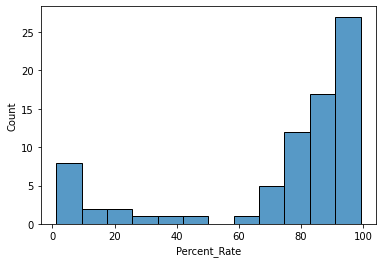

In [6]:
sns.histplot(data = Ping_df, x = "Percent_Rate")

In [7]:
Ping_df["Percent_Rate"].mean()

72.55987012987012